# Balancing the Dataset using pandas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
path = "./dataJoe/"

In [2]:
df =pd.read_csv(path+'dataset.csv')
classG = df[df['class'] == 'g']
classH = df[df['class'] == 'h']
countG, countH = df['class'].value_counts()

In [3]:
classGUnder = classG.sample(countH)

In [4]:
newDataset = pd.concat([classGUnder, classH])

In [5]:
df.to_csv(path+'balanced_dataset.csv',index=True)

# Data Split

In [6]:
traindf, testdf = train_test_split(newDataset, test_size=0.3,random_state=42,shuffle=True)

In [7]:
traindf.to_csv(path+'train_dataset.csv',index=True)
testdf.to_csv(path+'test_dataset.csv',index=True)

# Splitting Train dataset into folds

# Importing the models

In [8]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB

# Decision Tree

# AdaBoost

# KNN

# Random Forest

# Naive Bayes

In [9]:
newDataset

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
2117,45.5945,21.2593,3.0538,0.2102,0.1144,-19.4628,-32.9385,6.9607,9.0222,216.7460,g
10036,53.4552,13.4808,2.7536,0.3704,0.2055,-79.4267,30.9270,11.7094,10.0836,252.9500,g
8166,40.6449,13.3364,2.5855,0.3870,0.2247,-1.9070,-28.9783,9.9520,5.7872,232.2820,g
7023,34.8443,27.2440,3.1901,0.1885,0.1023,21.8882,-20.8094,18.2946,14.1710,187.7520,g
11666,20.2153,12.2239,2.3170,0.4964,0.2964,0.3888,3.5360,10.8678,39.3447,57.3510,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [10]:
x= newDataset.drop('class',axis=1) # 1 for column, 0 for index
y= newDataset['class']
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size=0.3,random_state=42,shuffle=True)

In [11]:
model = GaussianNB()

In [12]:
model.fit(x_train,y_train)

GaussianNB()

In [13]:
y_pred = model.predict(x_test)

In [14]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           g       0.61      0.89      0.72      2024
           h       0.79      0.41      0.54      1989

    accuracy                           0.66      4013
   macro avg       0.70      0.65      0.63      4013
weighted avg       0.70      0.66      0.64      4013



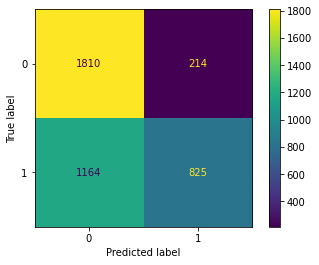

In [15]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()